<a href="https://colab.research.google.com/github/Gabuni19/Codigos-Shorts/blob/main/Ruteo_de_Vehiculos_VRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **VRP** (🚓)

In [31]:
import numpy as np
import time
import math

# La suma de los arcos (j) que salen de (i)
def FirstRestriction(x, n):
    # No se incluye al nodo almacen (0)
    for i in range(1,n):
        s = 0
        for j in range(n):
            if j != i:
                s += x[i][j]
        # La suma para este i debe ser 1
        if s != 1:
            return False
    return True

# La suma de los arcos (i) que entran a (j)
def SecondRestriction(x, n):
    # No se incluye al nodo almacen (0)
    for j in range(1,n):
        s = 0
        for i in range(n):
            if i != j:
                s += x[i][j]
        # La suma para este J debe ser 1
        if s != 1:
            return False
    return True

# La suma de todo arco (j) que sale de (0)
def ThirdRestriction(x, n, k):
    s = 0
    for j in range(1, n):
        s += x[0][j]
    if s != k:
        return False
    return True

def FourthRestriction(x, n, q, Q):
    ini = 1
    fin = n - 1
    conjunto = list(range(n))
    for n_sub in range(ini, fin + 1):
        for S in subConjunto_S(n, n_sub):
            s = 0
            sum_S = 0  # Almacena la suma de los salientes
            for i in S:
                s += q[i]
                for j in Complemento(S,n):
                    if i != j:
                        sum_S += x[i][j]

            rS = math.ceil(s / Q)

            if sum_S < rS:
                return False
    return True

def subConjunto_S(n, m):
    # n>m
    Subconjuntos = []
    for i in range(2**n):
        binario = bin(i)[2:].zfill(n)
        if binario[0] != "1" and binario.count("1") == m:
            combinacion = [j for j, bit in enumerate(binario) if bit == "1"]
            Subconjuntos.append(combinacion)
    return Subconjuntos

def CheckRestrictions(X, N, k, q, Q):
    cond1 = FirstRestriction(X, N)
    cond2 = SecondRestriction(X, N)
    cond3 = ThirdRestriction(X, N, k)
    cond4 = FourthRestriction(X, N, q, Q)
    return cond1 and cond2 and cond3 and cond4

def Complemento(U,n):
    return [j for j in range(n) if all(j != k for k in U)]

def Costo(X, W):
    return np.sum(X * W)

def P_X(n, m):
    def Recursiva(x, fila, columna, m_rest, n):
        if m_rest == 0:
            lpos.append(x.copy())
            return
        for i in range(n):
            for j in range(n):
                if i != j and x[i][j] == 0:
                    x[i][j] = 1
                    Recursiva(x, i, j, m_rest - 1, n)
                    x[i][j] = 0

    lpos = []  # Lista para almacenar las posiciones
    x = np.zeros((n, n), dtype=int)
    Recursiva(x, 0, 0, m, n)
    return lpos

def Matriz_W(n):
  W = np.random.randint(1,20,size = (n,n))
  W = ( W + W.T )//2
  np.fill_diagonal(W,0)
  return W


Probando las restricciones

In [88]:
import numpy as np

def generar_Xij(N, k):
    # Inicializa la matriz con ceros
    X = np.zeros((N, N), dtype=int)

    # Valores de i
    list_i = list(range(1,N))
    #print(f"i : {list_i}")
    # Valores de j
    list_j = list(range(1,N))
    #print(f"j : {list_j}")

    #Rellenamos la fila 0 con k 1s
    ind_f0 = np.random.choice(list_j, k, replace=False)

    #print(f"\nFila0 : {ind_f0}")
    #print()

    for i in ind_f0:
      X[0][i] =1

    # Quitamos los valores de la lista j
    list_j = [elemento for elemento in list_j if elemento not in ind_f0]
    #print(f"j : {list_j}")

    # Rellenamos la columna 0 con k 1s
    # Quitamos los valores de la lista i
    list_i = [elemento for elemento in list_i if elemento not in ind_f0]
    #print(f"i : {list_j}")
    ind_c0= np.random.choice(list_i, k, replace=False)
    #print(f"\nFila1 : {ind_c0}")
    #print()

    for i in ind_c0:
      X[i][0] =1

    #print(X)

    #Filas restantes
    rest_j = [elemento for elemento in range(1,N) if elemento not in ind_f0]
    rest_i = [elemento for elemento in range(1,N) if elemento not in ind_c0]
    #print(f"i : {rest_i}")
    #print(f"j : {list_j}")

    while rest_i:
      i = np.random.choice(rest_i, 1, replace=False)
      #print(i)
      rest_i = [elemento for elemento in rest_i if elemento not in i]
      #print(rest_i)
      j = np.random.choice(rest_j, 1, replace=False)
      #print(j)
      rest_j = [elemento for elemento in rest_j if elemento not in j]
      #print(rest_j)
      X[i[0]][j[0]]=1
    #print(X)
    return X

generar_Xij(N, k)

array([[0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [76]:
{1,2,3} - {2,3}

{1}

[[0 1 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]]
True


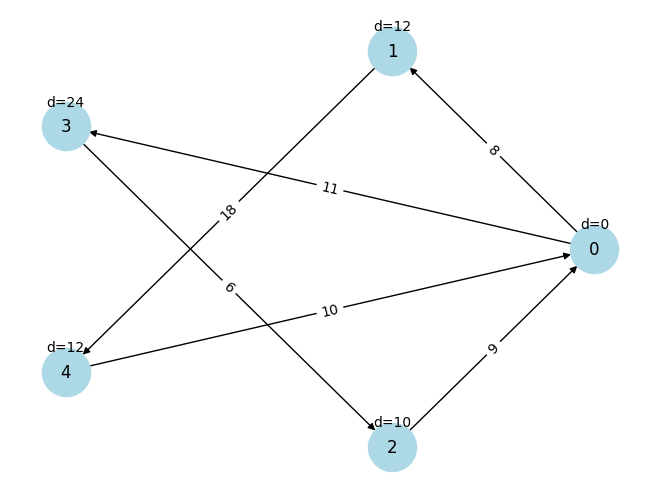

In [94]:
X = np.array([
    [0,0,0,1,1],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [0,0,1,0,0],
    [0,1,0,0,0]
])
N =5
W = Matriz_W(5)
q = [0,12,10,24,12]
k = 2
Q = 50

X = generar_Xij(N,k)
print(X)
print(CheckRestrictions(X, 5, k, q, Q))
dibujar_grafo_con_pesos_y_demandas(X, W, q)

## Generando posible solucion Factible

In [95]:
def generar_Xij(N, k):
    # Inicializa la matriz con ceros
    X = np.zeros((N, N), dtype=int)

    # Valores de i
    list_i = list(range(1,N))
    #print(f"i : {list_i}")
    # Valores de j
    list_j = list(range(1,N))
    #print(f"j : {list_j}")

    #Rellenamos la fila 0 con k 1s
    ind_f0 = np.random.choice(list_j, k, replace=False)

    #print(f"\nFila0 : {ind_f0}")
    #print()

    for i in ind_f0:
      X[0][i] =1

    # Quitamos los valores de la lista j
    list_j = [elemento for elemento in list_j if elemento not in ind_f0]
    #print(f"j : {list_j}")

    # Rellenamos la columna 0 con k 1s
    # Quitamos los valores de la lista i
    list_i = [elemento for elemento in list_i if elemento not in ind_f0]
    #print(f"i : {list_j}")
    ind_c0= np.random.choice(list_i, k, replace=False)
    #print(f"\nFila1 : {ind_c0}")
    #print()

    for i in ind_c0:
      X[i][0] =1

    #print(X)

    #Filas restantes
    rest_j = [elemento for elemento in range(1,N) if elemento not in ind_f0]
    rest_i = [elemento for elemento in range(1,N) if elemento not in ind_c0]
    #print(f"i : {rest_i}")
    #print(f"j : {list_j}")

    while rest_i:
      i = np.random.choice(rest_i, 1, replace=False)
      #print(i)
      rest_i = [elemento for elemento in rest_i if elemento not in i]
      #print(rest_i)
      j = np.random.choice(rest_j, 1, replace=False)
      #print(j)
      rest_j = [elemento for elemento in rest_j if elemento not in j]
      #print(rest_j)
      X[i[0]][j[0]]=1
    #print(X)
    return X


## **Funcion VRP** - `Fuerza Bruta`

In [26]:
def FuerzaBruta_VRP(W, Q, q, k):
    print("=== VRP - FUERZA BRUTA ===\n")

    # inicio del tiempo
    inicio = time.time()

    # Almacenamos el N
    N, n_c = np.shape(W)

    # Almacenamos las Posibles Soluciones
    m = (N - 1) + k
    Posibles_Xij = P_X(N, m)

    # Variable solución
    S = []
    minCosto = float('inf')
    # Buscamos el Minimo
    for Xij in Posibles_Xij:
        if CheckRestrictions(Xij, N, k, q, Q) and Costo(Xij, W) < minCosto:
            minCosto = Costo(Xij, W)
            S = Xij

    fin = time.time()

    # Calculamos el tiempo
    T_time = fin - inicio

    # Mostramos Solucion
    print(f" [+] Tiempo : {T_time} s")
    print(f" [+] Costo Minimo : {minCosto}")
    print(f" [+] Solución : \n{S} \n")
    return S



In [36]:
W = Matriz_W(4)
q = [0,12,13,14]
k = 1
Q = 50

Xij = FuerzaBruta_VRP(W,Q,q,k)

=== VRP - FUERZA BRUTA ===

 [+] Tiempo : 0.5072147846221924 s
 [+] Costo Minimo : 42
 [+] Solución : 
[[0 0 1 0]
 [0 0 0 1]
 [0 1 0 0]
 [1 0 0 0]] 



## **Grafica de la Solucion**



In [29]:
import matplotlib.pyplot as plt
import networkx as nx

def dibujar_grafo_con_pesos_y_demandas(matriz, pesos, demandas):
    G = nx.DiGraph()  # Crea un grafo dirigido
    n = len(matriz)

    for i in range(n):
        for j in range(n):
            if matriz[i][j] == 1:
                G.add_edge(i, j, weight=pesos[i][j])  # Añade una arista de i a j con su peso

    pos = nx.circular_layout(G)  # Posiciona los nodos en un círculo
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200)

    # Añade los pesos de las aristas al gráfico
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Añade las demandas de los nodos al gráfico
    for i in range(n):
        plt.text(pos[i][0], pos[i][1]+0.1, f'd={demandas[i]}', horizontalalignment='center')

    plt.show()


=== VRP - FUERZA BRUTA ===

 [+] Tiempo : 137.69112873077393 s
 [+] Costo Minimo : 30
 [+] Solución : 
[[0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [1 0 0 0 0]] 



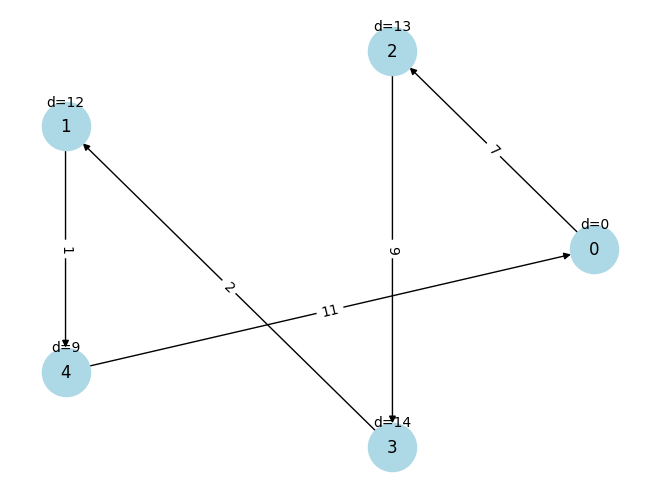

In [37]:
W = Matriz_W(5)
q = [0,12,13,14,9]
k = 1
Q = 50

Xij = FuerzaBruta_VRP(W,Q,q,k)
dibujar_grafo_con_pesos_y_demandas(Xij, W, q)


## Funcion con Posible Solucion Aleatoria

In [114]:
import numpy as np

def generar_Xij(N, k):
    # Inicializa la matriz con ceros
    X = np.zeros((N, N), dtype=int)

    # Valores de i
    list_i = list(range(1,N))
    #print(f"i : {list_i}")
    # Valores de j
    list_j = list(range(1,N))
    #print(f"j : {list_j}")

    #Rellenamos la fila 0 con k 1s
    ind_f0 = np.random.choice(list_j, k, replace=False)

    #print(f"\nFila0 : {ind_f0}")
    #print()

    for i in ind_f0:
      X[0][i] =1

    # Quitamos los valores de la lista j
    list_j = [elemento for elemento in list_j if elemento not in ind_f0]
    #print(f"j : {list_j}")

    # Rellenamos la columna 0 con k 1s
    # Quitamos los valores de la lista i
    list_i = [elemento for elemento in list_i if elemento not in ind_f0]
    #print(f"i : {list_j}")
    ind_c0= np.random.choice(list_i, k, replace=False)
    #print(f"\nFila1 : {ind_c0}")
    #print()

    for i in ind_c0:
      X[i][0] =1

    #print(X)

    #Filas restantes
    rest_j = [elemento for elemento in range(1,N) if elemento not in ind_f0]
    rest_i = [elemento for elemento in range(1,N) if elemento not in ind_c0]
    #print(f"i : {rest_i}")
    #print(f"j : {list_j}")

    while rest_i:
      i = np.random.choice(rest_i, 1, replace=False)
      #print(i)
      rest_i = [elemento for elemento in rest_i if elemento not in i]
      #print(rest_i)
      j = np.random.choice(rest_j, 1, replace=False)
      #print(j)
      rest_j = [elemento for elemento in rest_j if elemento not in j]
      #print(rest_j)
      X[i[0]][j[0]]=1
    #print(X)
    return X

def Best_Random_VRP(W, Q, q, k):
    print("=== VRP - Best Random Solution ===\n")

    # inicio del tiempo
    inicio = time.time()

    # Almacenamos el N
    N, n_c = np.shape(W)

    # Almacenamos las Posibles Soluciones
    m = (N - 1) + k

    # Generamos posibles soluciones
    Posibles_Xij =[]
    for i in range(1000):
      Posibles_Xij.append(generar_Xij(N, k))

    # Variable solución
    S = []
    minCosto = float('inf')
    # Buscamos el Minimo
    for Xij in Posibles_Xij:
        if CheckRestrictions(Xij, N, k, q, Q) and Costo(Xij, W) < minCosto:
            minCosto = Costo(Xij, W)
            S = Xij
            print(f" [+] Costo Minimo : {minCosto}")
            dibujar_grafo_con_pesos_y_demandas(Xij, W, q)

    fin = time.time()

    # Calculamos el tiempo
    T_time = fin - inicio

    # Mostramos Solucion
    print(f" [+] Tiempo : {T_time} s")
    print(f" [+] Costo Minimo : {minCosto}")
    print(f" [+] Solución : \n{S} \n")
    return S

=== VRP - Best Random Solution ===

 [+] Costo Minimo : 145


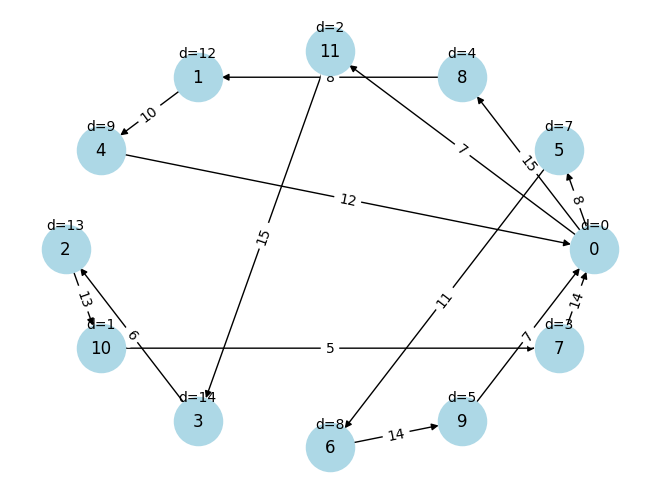

 [+] Costo Minimo : 122


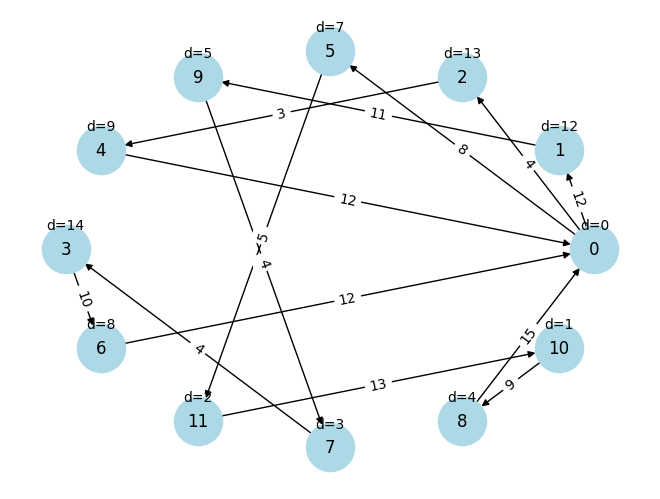

 [+] Costo Minimo : 120


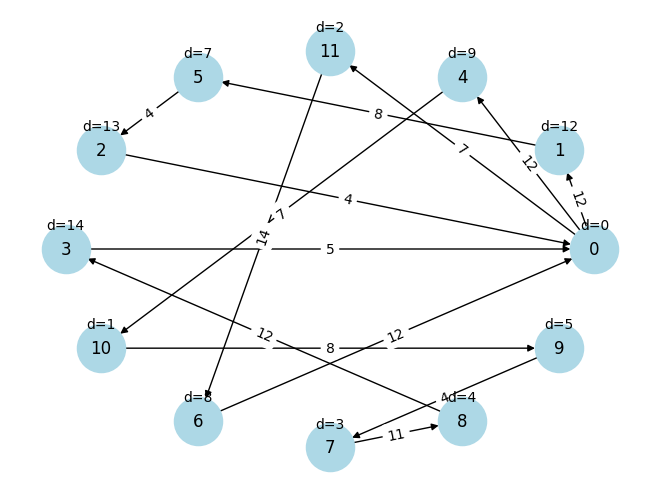

 [+] Costo Minimo : 108


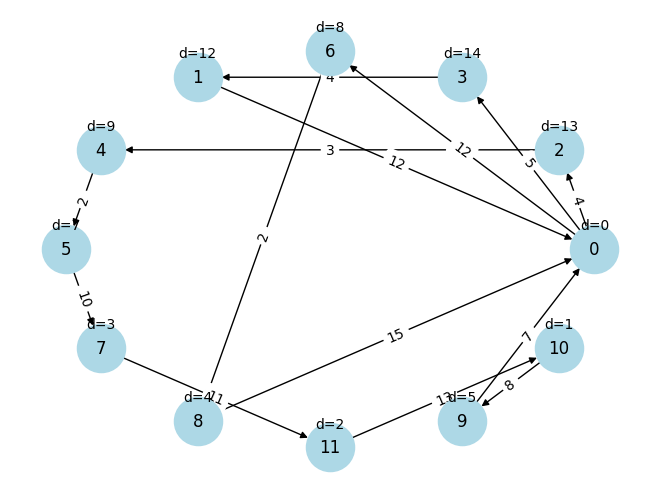

 [+] Costo Minimo : 102


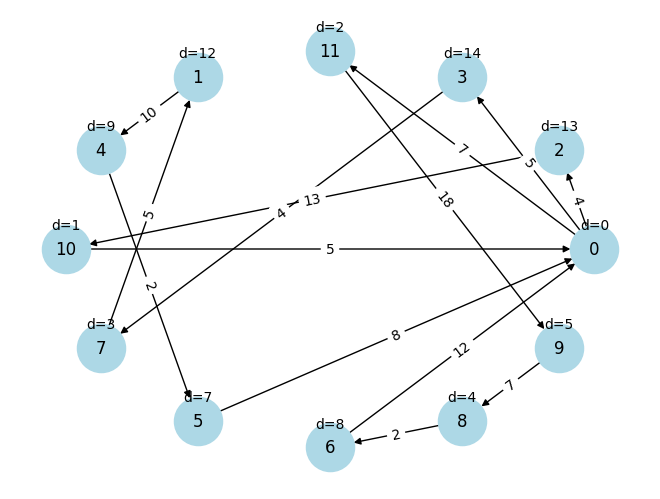

 [+] Costo Minimo : 99


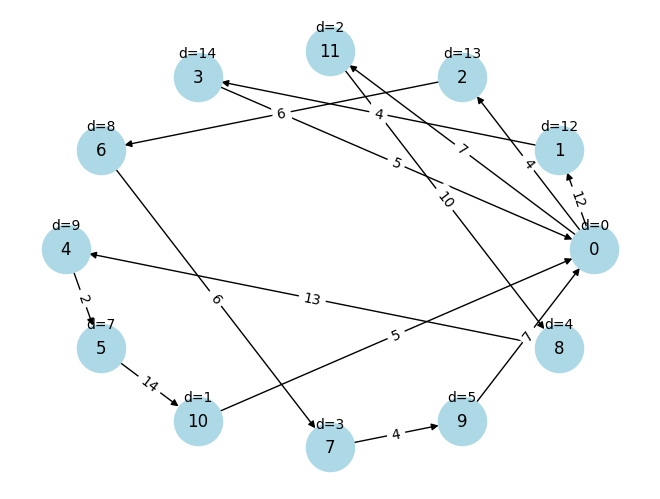

 [+] Tiempo : 64.31505751609802 s
 [+] Costo Minimo : 99
 [+] Solución : 
[[0 1 1 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]] 



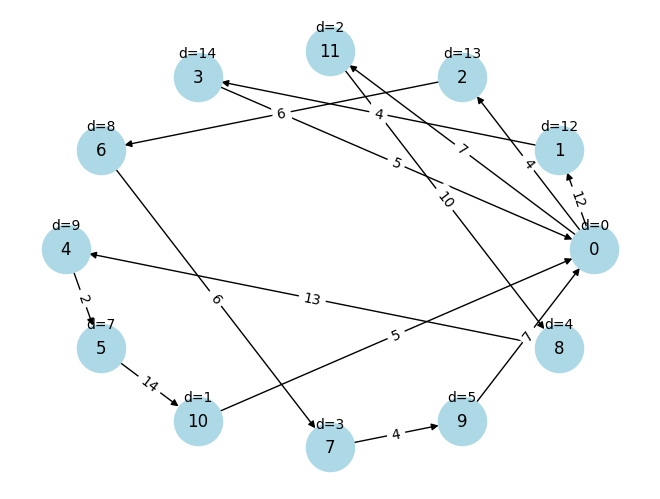

In [115]:
W = Matriz_W(12)
q = [0,12,13,14,9,7,8,3,4,5,1,2]
k = 3
Q = 50

Xij = Best_Random_VRP(W, Q, q, k)
dibujar_grafo_con_pesos_y_demandas(Xij, W, q)
